<a href="https://colab.research.google.com/github/ssubin29/DaconAlone/blob/main/DigitRecognizer/DigitRecognizer_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 라이브러리 임포트

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [ ]:
DATA_IN = '/content/drive/MyDrive/Colab/DaconAlone/DigitRecognizer/dataset'
train = pd.read_csv(DATA_IN+'/train/train_data.csv')
train.head()

,file_name,label
0,train0001.png,8
1,train0002.png,8
2,train0003.png,8
3,train0004.png,8
4,train0005.png,8


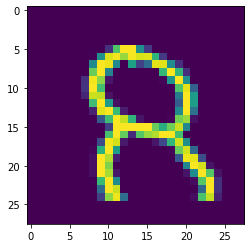

In [ ]:
file_dir = DATA_IN + '/train/'
sample_file = train['file_name'][0] # 0번째 인덱스 파일 이름 선택

sample_image_array= np.array(Image.open(file_dir + sample_file)) # path에서 이미지를 불러온 뒤 numpy array로 변환

# 이미지 출력
plt.imshow(np.array(sample_image_array))
plt.show()

In [ ]:
print('sample image의 모양:' ,sample_image_array.shape)

sample image의 모양: (28, 28)


In [ ]:
pd.set_option('display.max_columns', 28)
pd.DataFrame(sample_image_array)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,37,185,254,254,128,42,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,2,129,241,251,216,252,240,243,167,43,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,122,254,248,122,0,145,49,91,245,244,125,35,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,198,254,113,0,0,0,0,0,0,170,254,169,34,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,36,250,211,15,0,0,0,0,0,0,3,132,254,129,0,0,0,0,0,0,0


In [ ]:
images = []

for image_name in tqdm(train['file_name']):
    image = np.array(Image.open(file_dir + image_name)).flatten()
    # flatten() 28 * 28 이미지 데이터를 하나의 열벡터 784로 푸는 역할
    # ravel() 함수가 1차원 배열을 다차원 배열로 재배열해주는 것과는 반대로 작동
    images.append(image)

all_images = pd.DataFrame(images)
all_images['labels'] = train['label']

all_images

In [ ]:
test = pd.read_csv(DATA_IN + '/sample_submission.csv')
test.head()

In [ ]:
file_dir2 = DATA_IN + '/test/test/'

In [ ]:
images = []

for image_name in tqdm(test['file_name']):
    image = np.array(Image.open(file_dir2 + image_name)).flatten()
    # flatten() 28 * 28 이미지 데이터를 하나의 열벡터 784로 푸는 역할
    # ravel() 함수가 1차원 배열을 다차원 배열로 재배열해주는 것과는 반대로 작동
    images.append(image)

test_images = pd.DataFrame(images)
test_images['labels'] = test['label']

test_images

In [ ]:
test = np.array(test_images.drop("labels", axis=1)).astype('float32')

In [ ]:
train.head()

In [ ]:
X = np.array(all_images.drop("labels", axis=1)).astype('float32')
y = np.array(all_images['labels']).astype('float32')

X = X / 255.0
X = X.reshape(-1, 28, 28, 1)
y = to_categorical(y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_test = np.array(test).astype('float32')
X_test = X_test / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model1.png')

In [ ]:
#increse to epochs to 30 for better accuracy
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100, batch_size=85,verbose=2, validation_data=(X_val, y_val))

In [ ]:
results=model.predict(X_train, batch_size=85)
df = pd.DataFrame(results)
df.index.name='ImageId'
df.index+=1
#df.columns=['Label']
df.to_csv('results.csv', header=True)

In [ ]:
test_pred = pd.DataFrame(model.predict(X_test, batch_size=85))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

In [ ]:
test_pred.info()

In [ ]:
submission = pd.read_csv(DATA_IN + '/sample_submission.csv')
submission.head()

In [ ]:
submission['label']=test_pred['Label']

In [ ]:
submission.to_csv('results.csv', header=True,index=False)